# Housing Prices of Boston

### GMIT - Machine Learning and Statistics
### Guilherme Galluzzi Couto Paes - g00364695

<p align="center"><img src="https://www.southeastradio.ie/wp-content/uploads/2016/09/HousePrices.png" width=250px></p><br>

## Overview

This project is being made as a study on the known Boston Houses data set [1]. This dataset is made from a study from a US census regarding various house prices in different areas in the city of Boston, MA. Besides the price, the dataset also contains other 13 attributes, such as:

- CRIM - per capita crime rate by town
- N - proportion of residential land zoned for lots over 25,000 sq.ft.
- Among other 10 (which I will cover in detail over the next section)

This data was first published in 1978 by Harrison, D. and Rubinfeld, D.L. and it contains around 506 samples, which makes it fairly small given the size of Boston.

This notebook will be divided into 3 sections as follows:

1. Descriptive: The first section will be focused on conducting a statistical study on the dataset, where I will use descriptive statistics and plots to describe the Boston housing prices.

2. Inferential: This section will be used to analyse the dataset using inferential statistics in order to determine differences in house prices betwen their location.
3.  Predict: The last section will be left for the prediction, Where I will be utilizing the Python library, keras, to conduct a neural network to be able to predict the median house price

*****

In [1]:
# Importing all the necessary Python libraries necessary for this project

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import statsmodels.api as sm
import scipy.stats as ss
import keras as kr
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, KFold,  cross_val_score
from sklearn.datasets import load_boston

Using TensorFlow backend.


****

## 1. Descriptive

Descriptive statistics is used to describe and summarize a data set, and it can be used the entire representation or a sample of the data. descriptive statistics also masures the mean, median, mode an other measures such as standard deviation, variance and the kurtosis and skewness.

Frst I will use descriptive statistics and plots in order to better understand the dataset to be studied, and also to understand the correlation between all the variables.

In [2]:
# creating a var for the dataset which was imported from sklear datasets
boston = load_boston()

It's also good to understand all the values of the dataset, so we run the following code:

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


This translates to the following:

- data: contains the raw dataset
- target: prices of the houses
- feature_names: names of all the attributes
- DESCR: describes the attributes from the dataset

We can have a further look into the description:

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

With the basics of the dataset explained, we can now move on to start loading the data into a dataframe using pandas:

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


As stated below in the Overview, the target here is the median price of the houses, and this attribute is not shown in the above dataframe, so it's necessary to add it to the dataframe:

In [6]:
df['MEDV'] = boston.target

In [7]:
#Showing the updated dataframe

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In order to analyze this data in a more quantitative description, I will make use of the pandas describe function which gives us a well displayed summary of descriptive statistics:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


From the above, if we observe the mean (22.53) and the median (21.2) we can notice that the distribution is slightly right skewed. This is more obvious looking at distribution plots below.

#### Plotting and correlation

In order to better visualize the target we can plot the distribution of the target using the distplot function from seaborn, which is able to combine a histogram with a kernel density estimation plot:

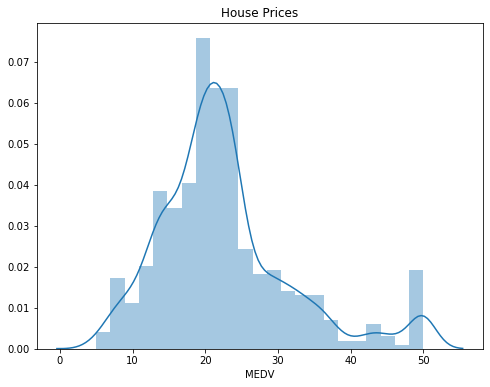

In [9]:
# plotting the the distribution of house prices
plt.figure(figsize=(8,6))
sns.distplot(df['MEDV'])
plt.title('House Prices')
plt.show()

To be easier to understand, we can make use of the histogram to graphically summarize and display the distribution of a process data set. This gives us a good look at the data, as to find out if it's symmetric or if it's skewed or even if the data contain outliers.



<function matplotlib.pyplot.show(*args, **kw)>

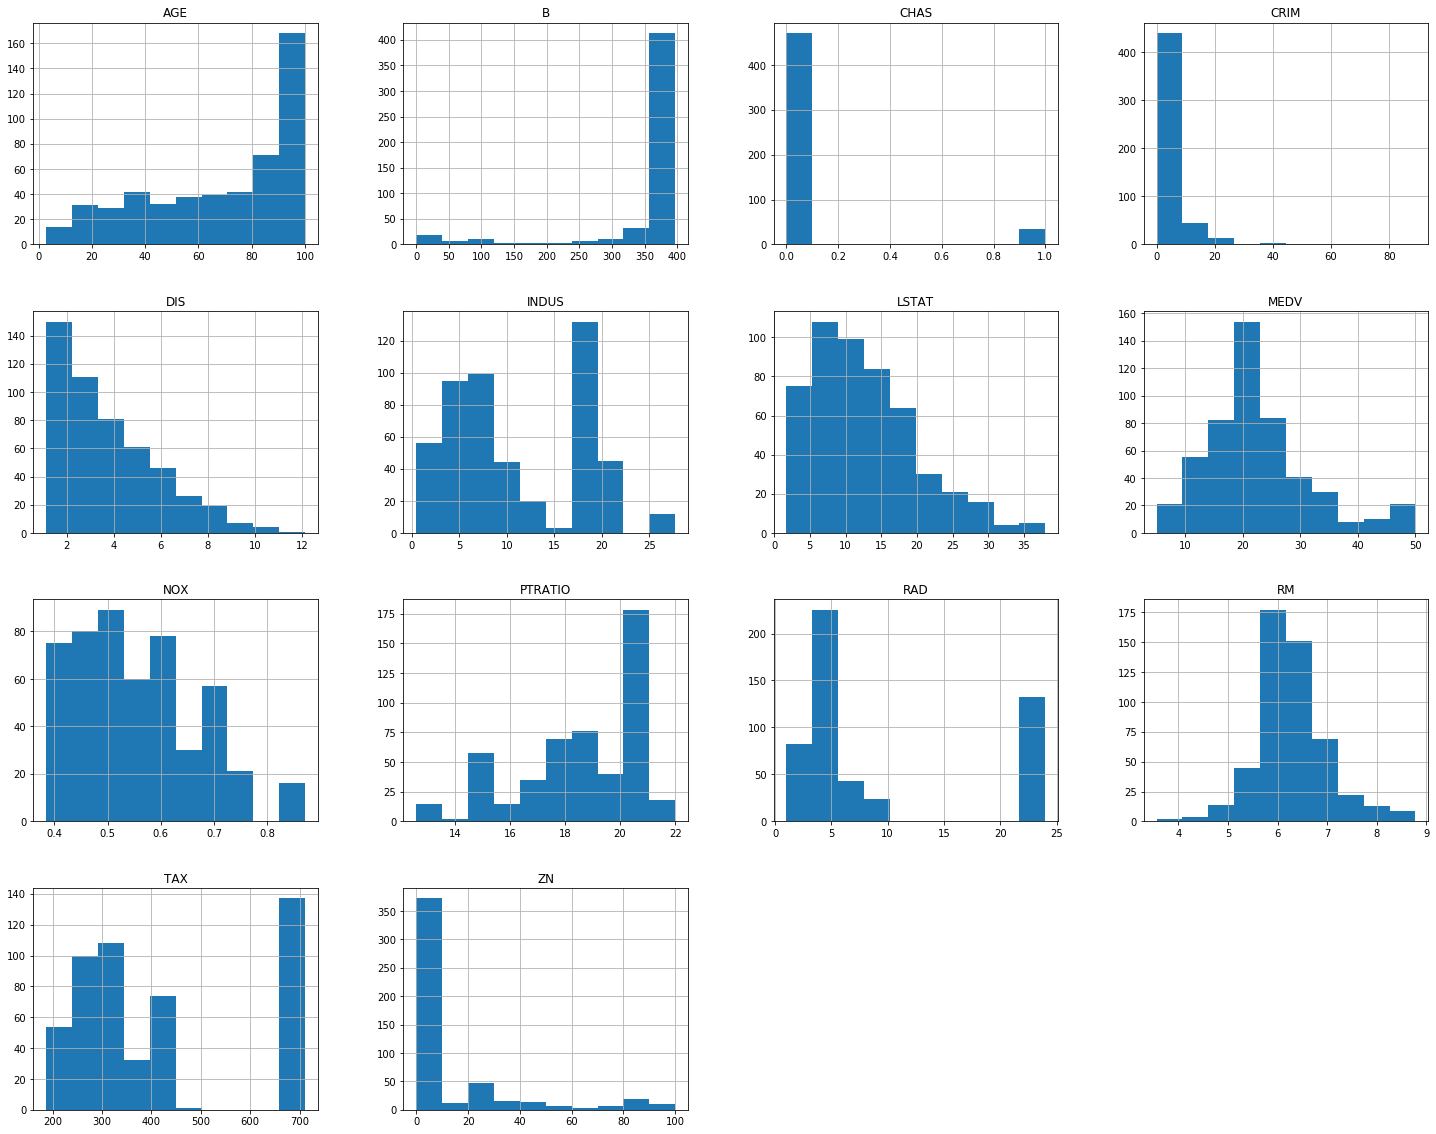

In [10]:
# plotting a histogram for each of the features

df.hist(figsize=(25, 20))
plt.show

It's also important to have a look into the correlation between the attributes, for this we can use the pandas function .corr(), which will provide us with all attributes and values in a range between -1 and 1, where 1 means a total correlation, 0 no correlation and -1 negative correlation.

This information is very important as it can help determine which variables are correlated and thus, worth further investigation.

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


For better visualization purposes we can utilize seaborn to plot a heattmap of these correlations:

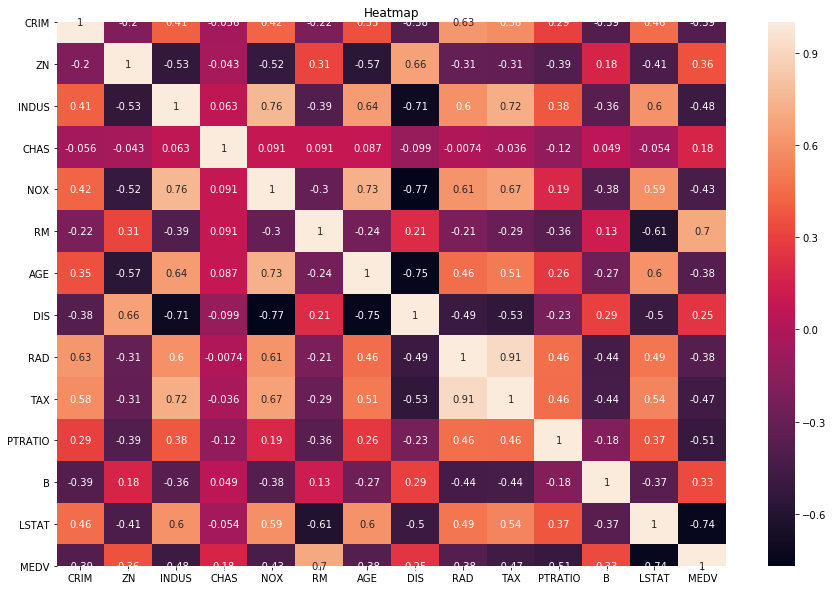

In [12]:
# generating a heatmap
plt.figure(figsize=(15,10))
plt.title('Heatmap')
sns.heatmap(data=df.corr(), annot=True)
plt.show()

By looking at the above correlation heatmap we can easily identify that RM has a strong positive correlation with MEDV (0.7) and that LSTAT and PTRATIO have a high negative correlation with MEDV (-0.74) and (-0.51) respectively.

I was able to describe in more details the relation between the attributes and their values using the help of Python and its libraries.

On the next section I will start covering the correlation between house prices using inferential statistics.

******

## 2. Inferential

Inferential statistics uses a sample of data set in order to describe and also make inferences about the data. The use of inferential statistics helps to make generalizations about the data.

In this section I will analyze if there is significante difference in the house prices between houses that are along the Charles river and those that aren't.


#### Splitting the Dataset into houses that are along the river

In [13]:
#separating CHAS and MEDV in another Dataframe
charles = ['CHAS', 'MEDV']
dfchas = df[charles]

#Filtering only the houses that are close to the charles river
charles1 = df['CHAS']==1
df_charles = dfchas[charles1]
price_close = df_charles['MEDV']

#houses that are far from the charles river
far = df['CHAS']==0
df_far = dfchas[far]
price_far = df_far['MEDV']

#printing number of houses
print("\n")
print("Number of houses along the river: " + str(df_charles.shape[0]))
print("Number of houses far from the river: " + str(df_far.shape[0]))



Number of houses along the river: 35
Number of houses far from the river: 471


#### Running a T-Test

A T Test is a kind of inferential statistic used to determine if there is difference between the means of two samples, which may be related in certain features.

The T-Test is also used as a hypothesis testing tool, in other words, it allows us of testing an assumption applicable to a given population.

The T-Test assumes a null hypothesis that the two means are equal, but after running certain calculations and comparing the standard values, we can determine if the null hypothesis is accepted or rejected, which is measured as the p-value. A large p-value (usually greater than 0.05 or 0.1) means that we cannot reject the null hypothesis, as if the p-value is smaller than 1%, 5% or even 10% sometimes, then we can reject the null hypothesis of equal averages.

In python we can make use of SciPy library to calculate the T-test as below: 

In [14]:
ss.ttest_ind(price_far, price_close)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

As we can see from the above calculation, the result of the T-Test between the price close and far from the river Charles is 7.390623170519883e-05. Which makes it clear to determine that the p-value is below 1%, this would imply that we can safely reject the null hypothesis, and therefore conclude that there is indeed a difference in the mean price between houses along the river and those not along river

#### OLS Regression

Ordinary least squares (OLS) regression is a statistical method that is used to estimate the relationship between one or more independent variables and a dependent variable [4]; OLS regression minimizes the sum of square differences between the observed and predicted values of the dependent variable. 

In [15]:
# Separating the columns to create OLS model for houses along the river
a=df[df['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
b=df[df['CHAS']==1]['MEDV']

# OLS Regression for houses along the charles river
model = sm.OLS(b, a).fit()
ols_predict = model.predict(a)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.663e+28
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:54:13   Log-Likelihood:                 1005.2
No. Observations:                  35   AIC:                            -1992.
Df Residuals:                      26   BIC:                            -1978.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHAS       -9.237e-14   5.31e-13     -0.174      0.8

In [16]:
# Separating the columns to create OLS model for houses not along the river
c=df[df['CHAS']==0][['RM', 'LSTAT', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
d=df[df['CHAS']==0]['MEDV']

# OLS Regression for houses not along the charles river
model_b = sm.OLS(d, c).fit()
ols_predict_b = model_b.predict(c)
print(model_b.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1185.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):                   1.02e-312
Time:                        21:54:13   Log-Likelihood:                         -1411.9
No. Observations:                 471   AIC:                                      2842.
Df Residuals:                     462   BIC:                                      2879.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Further Analysis and plotting

In [17]:
# checking the median price for houses along the river
mchas1 = price_close.median()
mchas0 = price_far.median()
print("\n")
print ("The median price for houses close to the river in $1000's is: ${0:.2f}".format(mchas1), "\n")
print ("The median price for houses far from the river in $1000's is: ${0:.2f}".format(mchas0))



The median price for houses close to the river in $1000's is: $23.30 

The median price for houses far from the river in $1000's is: $20.90


As we can see from the plot below, we can easily notice how the median price is slightly higher on the houses that are along the Charles river, the same can be said for the minimum/max price, although we do see some outliers with higher price on the houses that are not along the river, but that could be due to the fact that on this sample we only have 35 houses along the river, while having 471 which are not close to the river, what can cause having more outliers

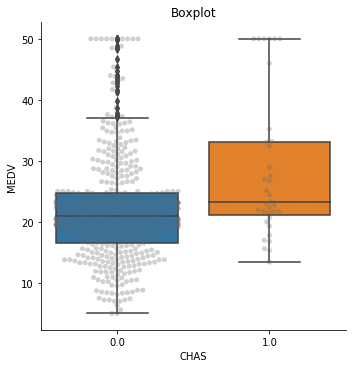

In [18]:
# A boxplot and also a swarm plot so we can see all data in the background

sns.catplot(x="CHAS", y="MEDV", data=df, kind="box")
sns.swarmplot(x="CHAS", y="MEDV", data=df, color=".40", alpha=0.3)
plt.title('Boxplot')
plt.show()
# CHAS 0 means far from the river, and 1 close to ther river


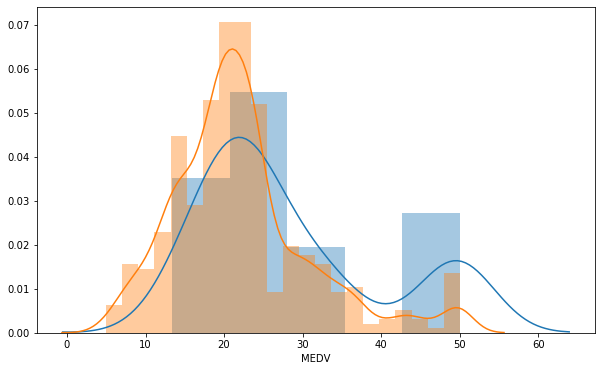

In [19]:
# distribution plot of house prices along/not along the river

plt.figure(figsize=(10,6))
ax1 = sns.distplot(price_close)
ax2 = sns.distplot(price_far)

Although the boxplots seems to show better the differences between the data, the above distribution plot can show us that both distributions have a similar shape

*****

## 3. Predict

The main objective of this section is to build a working model that is able to predict the value of the Boston houses, in order to do so, I will first need to separate the dataset into features and the target variable. The features, will provide quantitative information, as the target, 'MEDV', will be the variable to predict.

Also, according to my previous analysis, I identified that RM, LSTAT and PTRATIO are highly correlated, therefore it makes sense to use it as features in order to compare it with the price target MEDV.

The first step necessary is to split the data using Sklearn [2] and afterwards build a model and train it with the help of Keras [3].

#### Splitting the dataset

When building a machine learning model, usually, we split the data set into training and testing sets, where the training set is used to train the model and the testing set to test it.

After some research it seems that the most common split ratio is 70:30, but given that this is a small dataset I will be using a split ratio of 80:20. This splitting is done in order to easily model the dataset, as for the unseen data it's used to validate the model performance.



In [20]:
#First, split the dataset
Y = df['MEDV']
X = df[['RM', 'LSTAT', 'PTRATIO']]

# Split the inputs and outputs into training and test sets
# random_state will set a seed to the random generator
# test_size=0.2 represents a split ratio of 80:20.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)


# checking the shape of Test and Train
print("\nTotal values of X_Train :" ,X_train.shape[0])
print("Total values of X_Test  :"   ,X_test.shape[0])
print("\nTotal values of Y_Train :" ,Y_train.shape[0])
print("Total values of Y_Test  :"   ,Y_test.shape[0])


Total values of X_Train : 404
Total values of X_Test  : 102

Total values of Y_Train : 404
Total values of Y_Test  : 102


In [21]:
# prints first 5 values of X_test
X_test.head()

,RM,LSTAT,PTRATIO
337,5.895,10.56,20.2
30,5.713,22.60,21.0
364,8.780,5.29,20.2
240,6.897,11.38,16.6
162,7.802,1.92,14.7


In [22]:
# prints first 5 values of Y_test
Y_test.head()

337    18.5
30     12.7
364    21.9
240    22.0
162    50.0
Name: MEDV, dtype: float64

#### Linear Regression

In [23]:
# building a linear regression model
lm = LinearRegression()
lm.fit(X_train, Y_train)

lm_predict = lm.predict(X_test)
mse_lm = sklearn.metrics.mean_squared_error(Y_test, lm_predict)
print("Mean Squared Error: " + str("%.3f" % mse_lm))

Mean Squared Error: 28.052


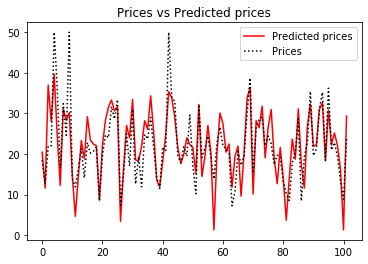

In [24]:
plt.plot(lm_predict, 'r-', label='Predicted prices')
plt.plot(Y_test.values, 'k:', label='Prices')
plt.rcParams['figure.figsize'] = (20, 10)
plt.title("Prices vs Predicted prices")
plt.legend()
plt.show()

As we can see, the linear regression model wasn't able to do a very good job, with it's very high mean square error of 28, I believe we can obtain better results building a new model with the help of Keras

#### Building a model

** Description of a model **

In [25]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.

# Add neurons
m.add(kr.layers.Dense(140, input_dim=3, activation='relu'))
m.add(kr.layers.Dense(60, activation="relu"))
m.add(kr.layers.Dense(30, activation="relu"))
m.add(kr.layers.Dense(1)) #the activation here is linear

# Compile the model.
m.compile(loss="mse", optimizer="adam", metrics = ['mae'])

# Train the model.
m.fit(X_train, Y_train, epochs=100, batch_size=8)


Epoch 1/100
404/404 [==============================] - 1s 1ms/step - loss: 253.7432 - mae: 12.4860
Epoch 2/100
404/404 [==============================] - 0s 257us/step - loss: 62.4407 - mae: 5.7257
Epoch 3/100
404/404 [==============================] - 0s 249us/step - loss: 41.6122 - mae: 4.8185
Epoch 4/100
404/404 [==============================] - 0s 257us/step - loss: 36.2157 - mae: 4.5285
Epoch 5/100
404/404 [==============================] - 0s 247us/step - loss: 30.7711 - mae: 4.1671
Epoch 6/100
404/404 [==============================] - 0s 244us/step - loss: 28.8819 - mae: 4.0417
Epoch 7/100
404/404 [==============================] - 0s 252us/step - loss: 24.3586 - mae: 3.7013
Epoch 8/100
404/404 [==============================] - 0s 242us/step - loss: 22.7199 - mae: 3.5002
Epoch 9/100
404/404 [==============================] - 0s 252us/step - loss: 21.7468 - mae: 3.3115
Epoch 10/100
404/404 [==============================] - 0s 244us/step - loss: 23.7716 - mae: 3.5010
Epoch 11/

404/404 [==============================] - 0s 242us/step - loss: 18.1329 - mae: 2.9980
Epoch 84/100
404/404 [==============================] - 0s 247us/step - loss: 18.9682 - mae: 3.0463
Epoch 85/100
404/404 [==============================] - 0s 239us/step - loss: 16.9171 - mae: 2.8758
Epoch 86/100
404/404 [==============================] - 0s 259us/step - loss: 17.7337 - mae: 2.9278
Epoch 87/100
404/404 [==============================] - 0s 249us/step - loss: 18.6569 - mae: 3.0476
Epoch 88/100
404/404 [==============================] - 0s 262us/step - loss: 17.1085 - mae: 2.8674
Epoch 89/100
404/404 [==============================] - 0s 244us/step - loss: 17.4254 - mae: 2.8839
Epoch 90/100
404/404 [==============================] - 0s 235us/step - loss: 17.7406 - mae: 2.9637
Epoch 91/100
404/404 [==============================] - 0s 247us/step - loss: 17.4083 - mae: 2.9427
Epoch 92/100
404/404 [==============================] - 0s 232us/step - loss: 18.4899 - mae: 3.1263
Epoch 93/100


In [26]:
m.evaluate(X_test, Y_test)

102/102 [==============================] - 0s 1ms/step


[27.397020657857258, 3.806874990463257]

#### Predict

In [27]:
# Have the network predict the test inputs.
predictions = m.predict(X_test)

In [28]:
# creating a var for mse value
mse = sklearn.metrics.mean_squared_error(Y_test, predictions)

In [29]:
# Comparing the predictions to the original house prices

#needed to reshape the predictions to have same dimension as Y_test

# Create a dataframe to store the predicted prices and Original price (Y_test) 
df_predict = pd.DataFrame({"Original Price":Y_test.values,"Predicted Price":predictions.reshape((102,))}) 
# Print head of the dataframe
df_predict.head(10)

,Original Price,Predicted Price
0,18.5,22.058376
1,12.7,13.105022
2,21.9,44.735157
3,22.0,26.892159
4,50.0,50.327007
5,36.2,23.059368
6,16.5,16.992439
7,32.4,34.951416
8,24.6,26.970482
9,50.0,39.910416


So as we can see from the above graphs, the predicted price is fairly matching the desired output, but it's not doing a great job, so we could try and getting a better approximation, in one way of improving the prediction is to normalize the data


** add more about normalisation **


    Normalization is used to re-scale the data between a specified range, to ensure that certain features do not affect the final prediction more than the other features.


In [30]:
# Normalizing the features (adapted from https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras)

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [31]:
#printing X_test after normalization
X_test.head()

,RM,LSTAT,PTRATIO
337,-0.561360,-0.289762,0.803208
30,-0.823180,1.426042,1.170233
364,3.588918,-1.040782,0.803208
240,0.880089,-0.172905,-0.848404
162,2.181996,-1.521036,-1.720089


In [32]:
# Train the model after normalization
m.fit(X_train, Y_train, epochs=100, batch_size=8)

Epoch 1/100
404/404 [==============================] - 0s 254us/step - loss: 61.1283 - mae: 5.8631
Epoch 2/100
404/404 [==============================] - 0s 242us/step - loss: 21.2277 - mae: 3.2900
Epoch 3/100
404/404 [==============================] - 0s 259us/step - loss: 19.3111 - mae: 3.1087
Epoch 4/100
404/404 [==============================] - 0s 244us/step - loss: 18.5583 - mae: 3.0561
Epoch 5/100
404/404 [==============================] - 0s 262us/step - loss: 18.6184 - mae: 2.9923
Epoch 6/100
404/404 [==============================] - 0s 249us/step - loss: 17.8354 - mae: 2.9580
Epoch 7/100
404/404 [==============================] - 0s 247us/step - loss: 17.4077 - mae: 2.8565
Epoch 8/100
404/404 [==============================] - 0s 244us/step - loss: 17.8554 - mae: 2.9114
Epoch 9/100
404/404 [==============================] - 0s 247us/step - loss: 17.1433 - mae: 2.8484
Epoch 10/100
404/404 [==============================] - 0s 257us/step - loss: 17.2869 - mae: 2.8330
Epoch 11/

404/404 [==============================] - 0s 239us/step - loss: 13.9102 - mae: 2.5151
Epoch 83/100
404/404 [==============================] - 0s 242us/step - loss: 13.6771 - mae: 2.5139
Epoch 84/100
404/404 [==============================] - 0s 237us/step - loss: 13.7304 - mae: 2.4755
Epoch 85/100
404/404 [==============================] - 0s 244us/step - loss: 14.0036 - mae: 2.5237
Epoch 86/100
404/404 [==============================] - 0s 237us/step - loss: 13.7947 - mae: 2.5236
Epoch 87/100
404/404 [==============================] - 0s 237us/step - loss: 13.8707 - mae: 2.5401
Epoch 88/100
404/404 [==============================] - 0s 242us/step - loss: 13.4657 - mae: 2.4386
Epoch 89/100
404/404 [==============================] - 0s 239us/step - loss: 14.0452 - mae: 2.5219
Epoch 90/100
404/404 [==============================] - 0s 237us/step - loss: 14.0147 - mae: 2.5170
Epoch 91/100
404/404 [==============================] - 0s 242us/step - loss: 13.6111 - mae: 2.4599
Epoch 92/100


In [33]:
m.evaluate(X_test, Y_test)

102/102 [==============================] - 0s 78us/step


[20.48680477516324, 3.0491392612457275]

In [34]:
norm_predict = m.predict(X_test)
mse_norm = sklearn.metrics.mean_squared_error(Y_test, norm_predict)
print("Mean Squared Error before normalization: " + str("%.3f" % mse))
print("Mean Squared Error after normalization: " + str("%.3f" % mse_norm))

Mean Squared Error before normalization: 27.397
Mean Squared Error after normalization: 20.487


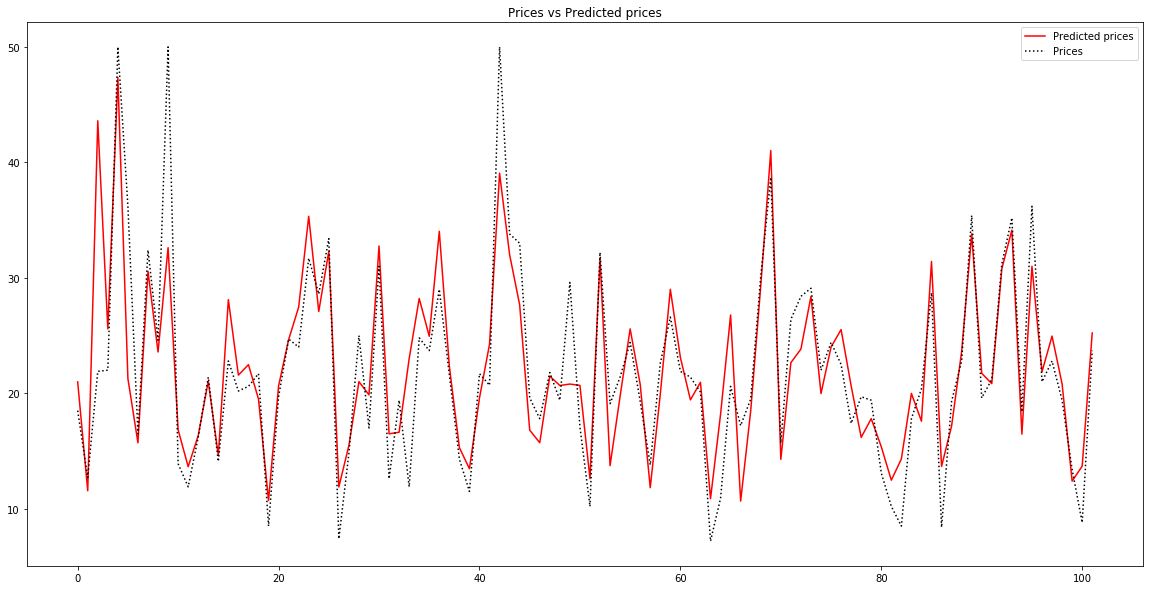

In [35]:
# plotting house prices comparisson with prediction
plt.plot(norm_predict, 'r-', label='Predicted prices')
plt.plot(Y_test.values, 'k:', label='Prices')
plt.rcParams['figure.figsize'] = (20, 10)
plt.title("Prices vs Predicted prices")
plt.legend()
plt.show()

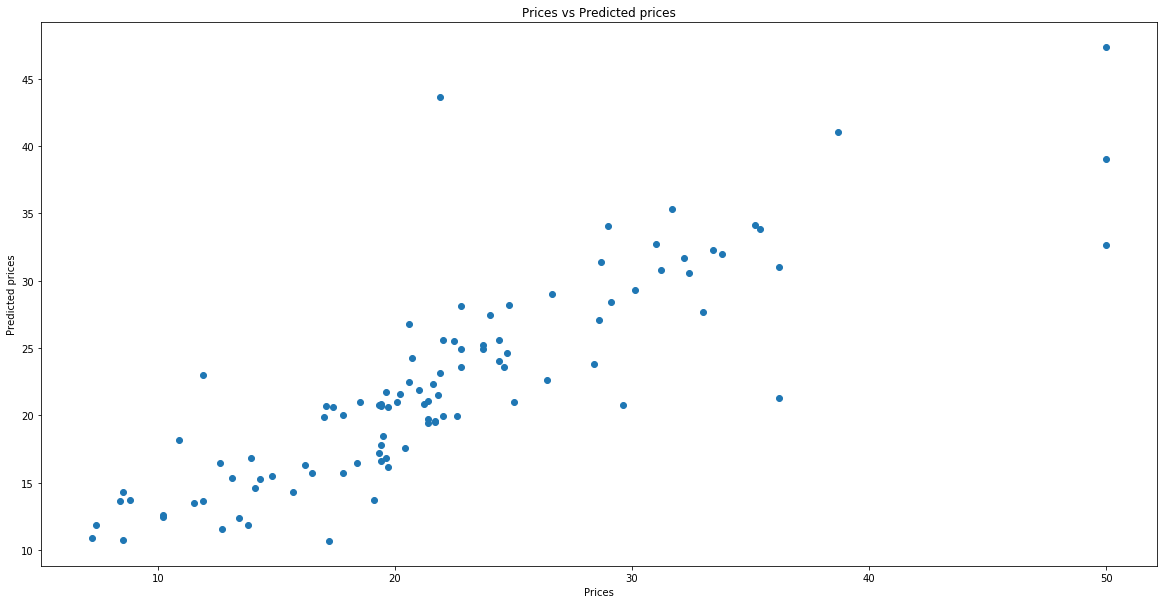

In [36]:
# scatter plot showing house price predictions
plt.scatter(Y_test, norm_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

As we can see, after normalizing the data, we obtained slightly more accurate approximation

In [37]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

In [38]:
score = performance_metric(Y_test.values, predictions.reshape((102,)))

print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

SyntaxError: invalid syntax (<ipython-input-38-dd283188e3fb>, line 3)

#### Whitening

In [ ]:
#import sklearn.decomposition as dec

In [ ]:
#pca = dec.PCA(n_components=3, whiten=True)
#pca.fit(X_train)
#X_train_white = pd.DataFrame(pca.transform(X_train), columns=X_train.columns)
#X_train_white[0:5]

In [ ]:
# Train the model after whitening
#m.fit(X_train, Y_train, epochs=100, batch_size=8)

In [ ]:
#m.evaluate(X_test, Y_test)

## References

[1] https://www.kaggle.com/c/boston-housing/overview

[2] https://scikit-learn.org/stable/index.html

[3] https://keras.io/

[4] https://www.encyclopedia.com/social-sciences/applied-and-social-sciences-magazines/ordinary-least-squares-regression